<a href="https://colab.research.google.com/github/DavidCarneros/notebooks_uned/blob/main/Tema_4_estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema 4. Introducción al aprendizaje supervisado

En este tema se verán algunos conceptos básicos relativos al aprendizaje supervisado, que está indicado en la modelización de una __variable respuesta__ $Y$ (explicativa, _output_ o resultado) a través de múltiples variables explicativas $X_1, X_2, ..., X_p$ (predictores, características o _input_). A lo largo de este tema se verá que, dentro del análisis supervisado, lo que determina el modelo a utilizar es la naturaleza de la variable respuesta.

## Tipos de modelos 

Según la naturaleza de la variable respuestas, los principales modelos del análisis supervisado son:

-  $Y$ __dicotómica__: regresión logística / análisis discriminante
-  $Y$ __continua__: regresión lineal
- $Y$ __nominal__: regresión logística politómica / análisis discriminante politómico.
- $Y$ __ordinal__: regresión de riesgo de proporcionales (_odds proportional regression_).


Por otro lado, los principales modelos de análisis supervisado se suelen enumerar según la dicotomía:

- __Regresión__: en el caso de que la variable repuesta sea continua.
- __Clasificación:__ en el caso de que la variable respuesta sea nominal.


## Construcción del modelo

La mayoría de los modelos establecen una relación de $Y$ en términos de $X = (X_1, X_2, ..., X_p)$ a través de una ecuación del tipo:

$Y = f(X_1, X_2, ..., X_p) + \varepsilon = f(X) + \varepsilon$ 

donde $f$ es una función fija pero desconocida, que representa la información sistemática de las variables explicativas, y $\varepsilon$ es una v.a. independiente de $X$ con $E[\varepsilon]=0$, que representa una perturbación de la información sistemática de X. 

### Codificación de las variables explicativas

La codificación de las variables explicativas para que formen parte de los modelos se hace de la forma siguiente:

- Si son continuas, no es necesario hacer ninguna codificación. Se introducen en el modelo directamente con sus valores numéricos.

- Si son nominales con *k* categorías, es necesario crear $k - 1$ variables ficticias (*dummy*). Existen varias formas de crear dichas variables. Uno de los métodos, es el dado en la siguiente tabla.

| Variable nominal | Dummy_2 | Dummy_3 | ... | Dummy_k |
|------------------|---------|---------|-----|---------|
| Nivel 1          | 0       | 0       | ... |         |
| Nivel 2          | 1       | 0       | ... |         |
| Nivel 3          | 0       | 1       | ... |         |
| ...              | ...     | ...     | ... |         |
| Nivel k          | 0       | 0       | ... |         |

- Si son ordinales, una posibilidad es tratarlas como nominales, pero se estaría perdiendo información. Sin embargo, lo más adecuado sería transformaciones ortogonales. No sería correcto introducirlas como si fueran continuas con valores numéricos asociados a los niveles ordenados. 

A menudo, también se suelen considerar transformaciones de variables explicativas e interacciones entre variables explicativas que se codifican como el producto de éstas. 

### Ajuste del modelo

**Pendiente, quiero revisar en el libro porque hay una sección en la que explica modelos paramétricos y no paramétricos**

## ¿Qué es el Aprendizaje Estadistico?


---


Imaginemos que somos una consultora estadística, y un cliente nos ha contratado para que le asesoremos sobre cómo mejorar las ventas de un determinado producto. Nos proporciona un *dataset* **_Advertising_** con las ventas de dicho producto en 200 mercados diferentes, junto con el presupuesto destinado a publicidad en cada uno de estos mercados para tres medios de comunicación: **TV**, **radio** y **periódico**. En la siguiente figura se respresenta gráficamente los datos de este *dataset*, utilizando miles de unidades como médida de las ventas y miles de dólares para el presupuesto destinado a cada uno de los medios de comunicación. La línea azul representa un simple modelo que se podría utiliar para predecir el número de ventas en función del presupuesto en publicidad. 
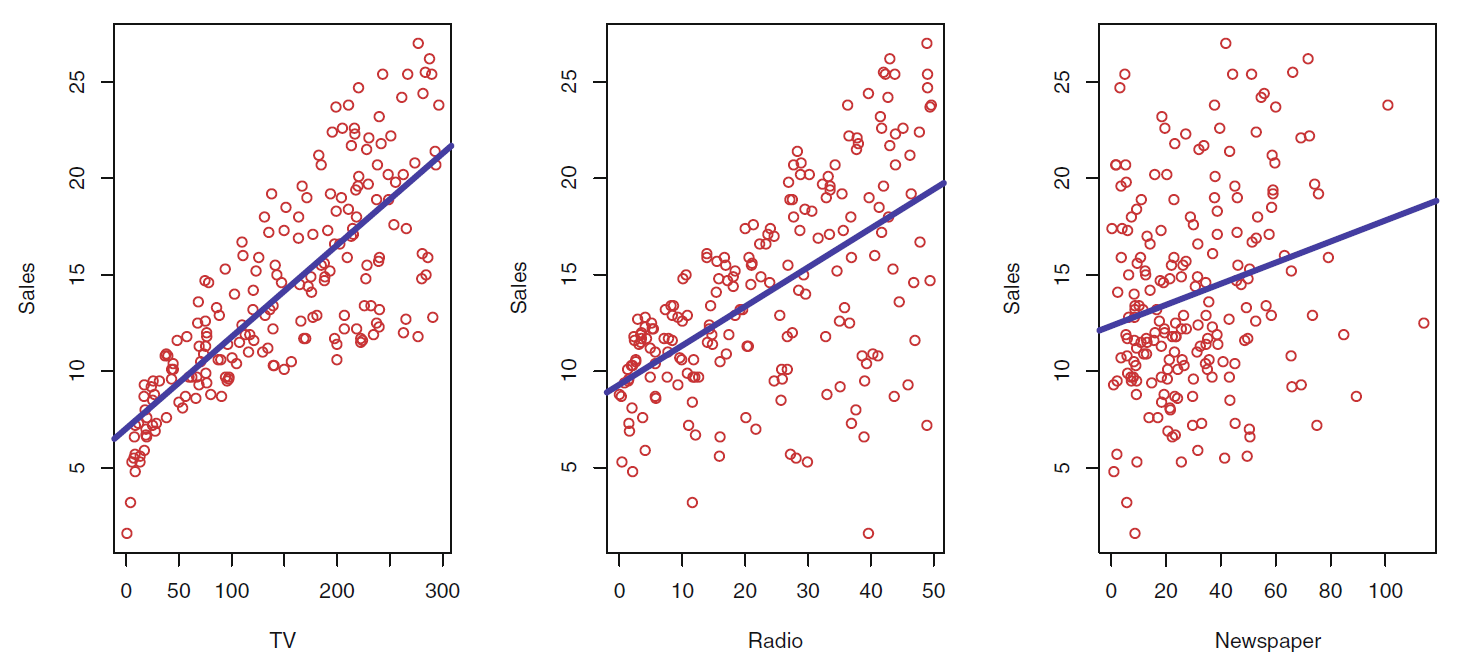


Si somos capaces de encontrar una relación enter la publicidad y las ventas, podremos aconsejar al cliente para que incremente sus ventas ajustando el presupuesto que destina a publicidad.  En otras palabras, nuestro objetivo es desarollar un modelo preciso que se utilice para hacer predicciones de ventas a partir de los datos de entrada.

En este contexto, los datos sobre el presupuesto serían las **variables de entrada**, mientras que el número de ventas son la **variable salida**. Las variables de entrada se denotan con el símbolo $X$, con un subíndice para distinguir cada una de ellas. Por ejemplo, $X_1$ es el prespuesto destinado a TV, $X_2$ el prespuesto de radio y $X_3$ el presupuesto de periódico. La variable de salida, o variable dependiente, se denota con el símbolo $Y$. 

De manera más genérica, podemos escribir que existe una relación entre $Y$ y las $p$ diferentes variables predictivas, $X = (X_1, X_2, ..., X_p)$, como:

$Y = f(X) + \varepsilon$

Donde $f$ es una función desconocida de $X_1, ..., X_p$, y 
$\varepsilon$ es un término de error, independiente de $X$ y con media cero. En esta fórmula, $f$ representa la información sistemática que X proporciona sobre Y.




### ¿Por qué estimar $f$?

Hay dos motivos principales para estimar $f$, la **predicción** y la **inferencia**.

#### Predicción
En muchas situaciones, no es sencillo obtener la salida $Y$ a partir de las entradas $X$. En estos casos, dado que el término de error promedia 0, el objetivo es determinar $\hat{f}$ para estimar $f$ y poder predecir $\hat{Y}$ a través de:

$\hat{Y} = \hat{f}(X)$

donde $\hat{f}$ representa nuestra estimación para $\hat{f}$ y $\hat{Y}$ el resultado de predecir Y. En este contexto, $\hat{f}$ se considera como una caja negra, en el sentido de que no nos tenemos que preocupar por la forma de $\hat{f}$ si da como resultado predicciones precisas para $Y$.

Una medida del error que se comete cuando se utiliza el modelo estimado es:

$E[Y - \hat{Y}]^{2}$

Esta medida del error se puede descomponer de forma que aparezcan dos sumandos, según se detalla a continuación:

$E[Y - \hat{Y}]^{2} = E[f(X) + \varepsilon - \hat{f}(X)]^{2} = (f(X) - \hat{f}(X))^{2} + V[\varepsilon]$

El primer sumando de dicha descomposición se denomina **error reducible**, y el segundo, **error irreducible**, ya que aunque se llegue a estimar $f$ de forma perfecta, siempre existará el error debido a la perturbación de $\varepsilon$.

El objetivo del libro es mostrar técnicas para estimar $f$ con la idea de minimizar el error reducible. 


#### Inferencia

A menudo nos interesa comprender la forma en que $Y$ se ve afectado cuando $X_1, ..., X_p$ cambia. En esta situación, deseamos estimar $f$, pero nuestro objetivo no es necesariamente hacer predicciones para $Y$. En su lugar, queremos comprender la relación entre $X$ e $Y$, o más específicamente, comprender cómo cambia $Y$ en función de $X_1, .. ., X_p$. 

- *¿Qué predictores están asociados con la respuesta?* A menudo se da el caso de que sólo una pequeña fracción de los predictores disponibles están sustancialmente asociados con $Y$. La identificación de los pocos predictores importantes puede ser extremadamente útil.

- *What is the relationship between the response and each predictor?* Algunos predictores pueden tener una relación positiva con $Y$, en el sentido de que aumentar el predictor está asociado con valores crecientes de $Y$. Otros predictores pueden tener la relación opuesta. Dependiendo de la complejidad, la relación entre la respuesta y un predictor dado también puede depender de los valores de los otros predictores.

- *Can the relationship betweenYand each predictor be adequately sum-marized using a linear equation, or is the relationship more compli-cated?* Históricamente, la mayoría de los métodos para estimar $f$ han adoptado una forma lineal. En algunas situaciones, tal suposición es razonable o incluso deseable. Pero a menudo la verdadera relación es más complicada, en cuyo caso un modelo lineal puede no proporcionar una representación precisa de la relación entre las variables de entrada y salida.

Por ejemplo, considere una empresa que esté interesada en realizar una campaña de marketing directo. El objetivo es identificar a las personas que responderán positivamente a un correo, basándose en las observaciones de las variables demográficas medidas en cada individuo. En este caso, las variables demográficas sirven como predictores y la respuesta a la campaña de marketing (ya sea positiva o negativa) sirve como resultado. La empresa no está interesada en obtener una comprensión profunda de las relaciones entre cada predictor individual y la respuesta; en cambio, la empresa simplemente quiere un modelo preciso para predecir la respuesta utilizando los predictores. Este es un ejemplo de modelado para predicción.

Por el contrario, considerese los datos de **Advertising** puestos anteriormente. Uno puede estar interesado en responder preguntas como: *¿Qué medios contribuyen a las ventas?*, *¿Qué medios generan el mayor impulso en las ventas?* o *¿Cuánto aumento en las ventas está asociado con un dado un aumento en la publicidad televisiva?* Esta situación cae en el paradigma de inferencia. 

Dependiendo de si nuestro objetivo final es la predicción, la inferencia o una combinación de los dos, pueden ser apropiados diferentes métodos para estimar $f$. Por ejemplo, los modelos lineales permiten una inferencia relativamente simple e interpretable, pero pueden no producir predicciones tan precisas como algunos otros enfoques. En contraste, algunos de los enfoques altamente no lineales que discutimos en los últimos capítulos de este libro pueden potencialmente proporcionar predicciones bastante precisas para $Y$, pero esto se produce a expensas de un modelo menos interpretable para el que la inferencia es más desafiante.

### ¿Cómo estimar $f$?

Tanto las aproximaciones lineales como las no lineales para estimar f tienen unas características compartidas. En esta sección se van a comentar esas características. Siempre asumiremos que hemos observado un conjunto de n puntos de datos diferentes. Por ejemplo en la siguiente imagene se observan 30 datos. Estas observaciones se denominan datos de entrenamiento porque usaremos las observaciones de datos de entrenamiento para entrenar o enseñar a nuestro método cómo estimar $f$ 

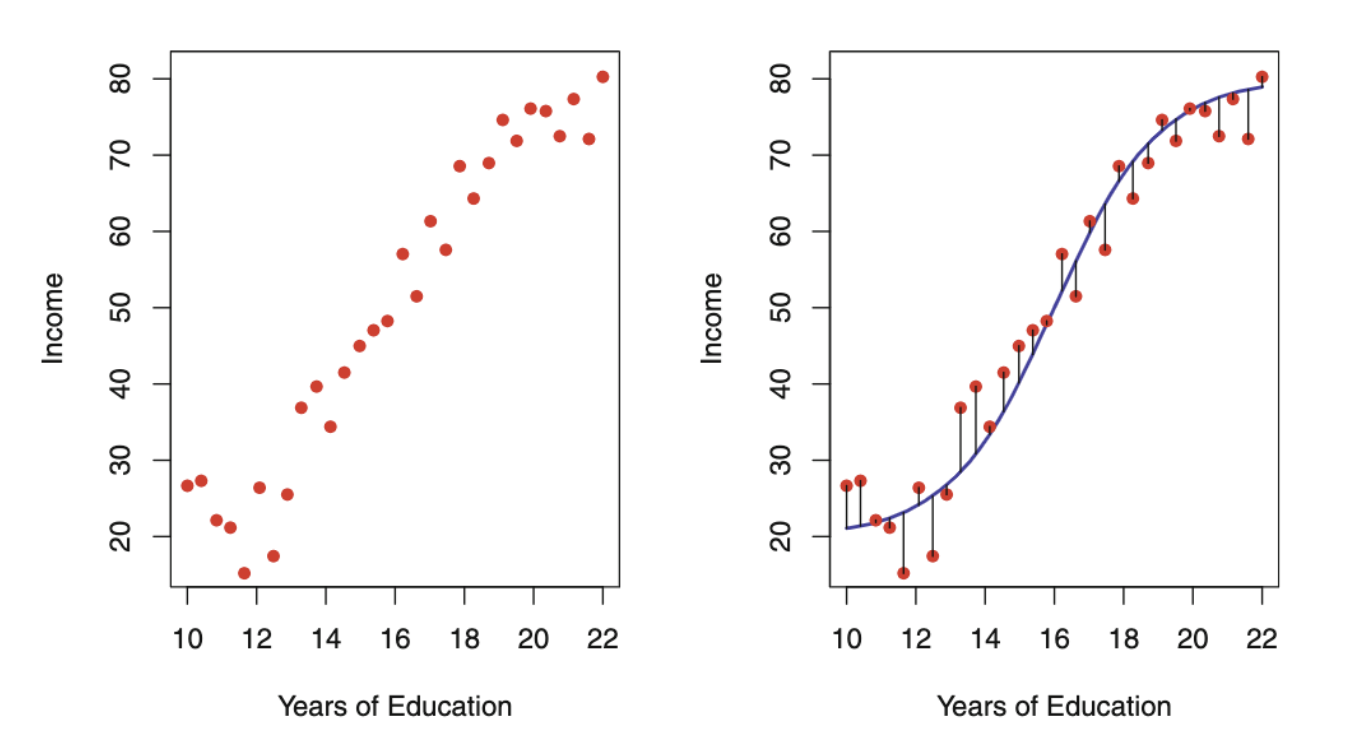

Sea $x_ij$ el valor del j-ésimo predictor, o entrada, para la observación $i$, donde $i = 1,2, ..., n$ y $j = 1,2, ..., p$. En consecuencia, sea $y_i$ la variable de respuesta para la i-ésima observación. Entonces, nuestros datos de entrenamiento consisten en $\{(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)\}$ donde $x_i = (x_i1, x_i2, ..., x_ip)^T$.

Nuestro objetivo es aplicar un método de aprendizaje estadístico a los datos de entrenamiento para estimar la función desconocida $f$. En otras palabras, queremos encontrar una función $\hat{f}$ tal que $Y ≈ \hat{f}(X)$ para cualquier observación $(X, Y)$

#### Modelos paramétricos

Los métodos paramétricos implican un enfoque basado en modelos de dos pasos

  1. Primero, hacemos una suposición sobre la forma funcional, o forma, de $f$. Por ejemplo, una suposición muy simple es que $f$ es lineal en $X$:

  $$ f(X) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p $$

  Una vez que asumimos que $f$ es lineal, el problema de estimar $f$ se simplifica enormemente. En lugar de tener que estimar una función p-dimensional completamente arbitraria $f(X)$, solo se necesita estimar $p + 1$ coeficientes $\beta_0, \beta_1, ..., \beta_p$.

  2. Una vez que se ha seleccionado un modelo, necesitamos un procedimiento que utilice los datos de entrenamiento para adaptar el modelo. Después de seleccionar un modelo, necesitamos un procedimiento que use los datos de entrenamiento para *ajustar o entrenar* el modelo. En el caso del modelo lineal, necesitamos estimar los parámetros $\beta_0, \beta_1, ..., \beta_p$. Es decir, queremos encontrar valores de estos parámetros tales que:

  $$ Y ≈ \beta_0 + \beta_1 X_1 + \beta_1 X_2 + ... + \beta_p X_p $$

  Una forma de ajustar el modelo visto en la iamgen superior es mediante los *minimos cuadrados* como puede verse en la siguiente imagen.

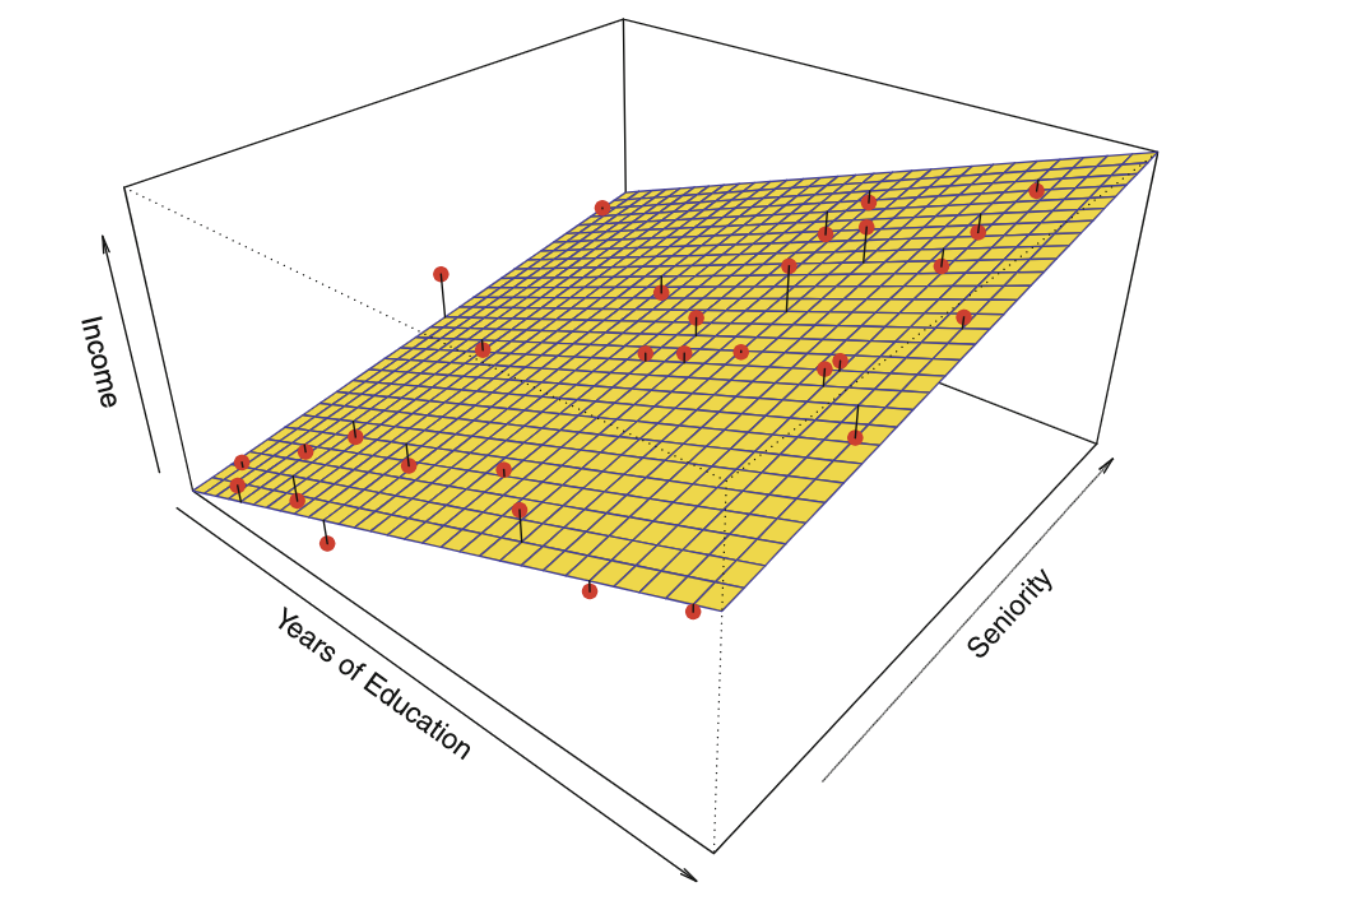



#### Modelos no paramétricos 

El enfoque basado en modelos que se acaba de describir se denomina paramétrico; reduce el problema de estimar $f$ a uno de estimar un conjunto de parámetros. Asumir una forma paramétrica para $f$ simplifica el problema de estimar $f$ porque generalmente es mucho más fácil estimar un conjunto de parámetros, como $\beta_0, \beta_1, ..., \beta_p$ en el modelo lineal, que ajustar un función arbitraria $f$. La posible desventaja de un enfoque paramétrico es que el modelo que elegimos generalmente no coincidirá con la verdadera forma desconocida de $f$. Si el modelo elegido está demasiado lejos de la verdadera $f$, la estimación nour será mala. Podemos intentar abordar este problema eligiendo modelos *flexibles* que puedan adaptarse a muchas formas funcionales posibles diferentes para $f$. Pero, en general, ajustar un modelo más flexible requiere estimar un número mayor de parámetros. Estos modelos más complejos pueden dar lugar a un fenómeno conocido como sobreajuste de los datos, lo que esencialmente significa que siguen los errores o el ruido demasiado de cerca.

## Evaluación de la precisión del modelo